## Table of Contents
<br>

* [Data Cleaning](#Data-Cleaning) 
<br>
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Structural Factors](#Do-the-structural-factors-such-as-number-of-rooms-and-age-of-house-and-accessibility-factors-such-as-distance-to-highways-and-employment-centres-affect-the-value-of-houses?)
    
    * [Environmental Factors](#Does-the-level-of-air-pollution-play-a-role-in-the-price-of-houses-in-the-Boston-area?)
    
    * [Neighborhood Factors](#What-type-of-neighborhood-is-more-desirable-for-home-buyers?)
<br>    
* [Regression Models](#Regression-Models)
    * [Multiple Linear Regression](#1.-Multiple-Linear-Regression)
        * [Linear regression assumptions](#Checking-whether-the-linear-regression-assumptions-hold)
        
    * [Polynomial Regression](#2.-Polynomial-Regression)
    * [Decision Tree Regression](#3.-Decision-Tree-Regression)
    * [Random Forest Regression](#4.-Random-Forest-Regression)
    * [XGBoost Regression](#5.-XGBoost-Regression)
<br>
* [Performance Evaluation](#Performance-Evaluation)     


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

The 'Boston housing' dataset contains the median prices of houses in the Boston metropolitan area, along with a set of socio-economic features including the number of rooms, crime rate of the town, distance to the highways and more. 
<br>

Source: UCI Machine learning repositary - https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [2]:
#importing the dataset

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", header = None, names = columns, delimiter = r"\s+")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Data Cleaning

In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- ZN: The 25th and 50th percentile is 0 indicating that the distribution of ZN is highly skewed <br>
- CHAS: The 25th, 50th, and 75th percentile is 0, once again showing that the data is highly skewed, which is likely because it is categorical.


**Missing values**

In [29]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the dataset

**Distribution of target variable**

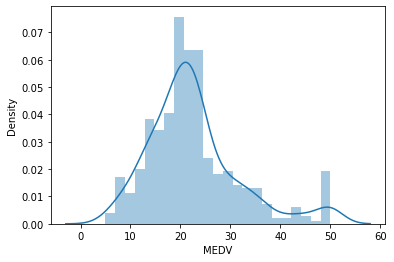

In [30]:
sns.distplot(df["MEDV"])
plt.show()

The target variable (MEDV) follows an approximately normal distribution.

**Outliers**

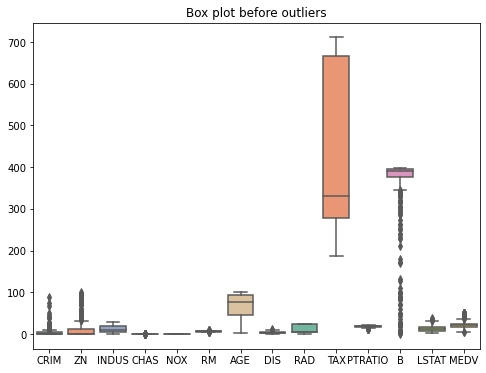

In [42]:
plt.figure(figsize = (8,6))
sns.boxplot(data=df, palette="Set2")
plt.title("Box plot before outliers")
plt.show()

In [43]:
#removing the outliers


outliers_list = []
for feature in df.keys()[:13]:
    
    # Calculate Q1 (25th percentile) for each feature
    Q1 = np.percentile(df[feature], 25)
    
    # Calculate Q3 (75th percentile) for each feature
    Q3 = np.percentile(df[feature], 75)
    
    # Using 1.5*Interquartile range to define the upper and lower boundaries
    step = (Q3 - Q1) * 1.5
    
    outliers = list(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index.values)
    outliers_list.extend(outliers)

duplicate_outliers_list = list(set([x for x in outliers_list if outliers_list.count(x) >= 2]))
duplicate_outliers_list.sort()


outliers  = duplicate_outliers_list

# Remove the outliers
df = df.drop(df.index[outliers]).reset_index(drop = True)

print("Number of outliers in the data that was removed:", len(outliers))

Number of outliers in the data that was removed: 62


**Relationships between variables**

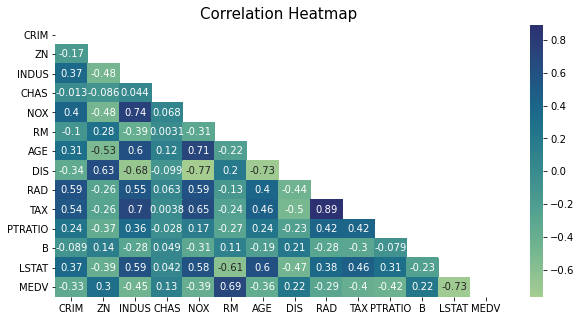

In [44]:
#Correlation heatmap

plt.figure(figsize = (10,5))

mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True,
           mask = mask, cmap = "crest")
plt.title("Correlation Heatmap", fontsize =15)

#plt.savefig("Regression - Correlation heatmap.png")
plt.show()

The variables "RAD" and "TAX" are highly correlated indicating the presence of multicolliearity. <br>
Keeping both variables in the model is not efficient

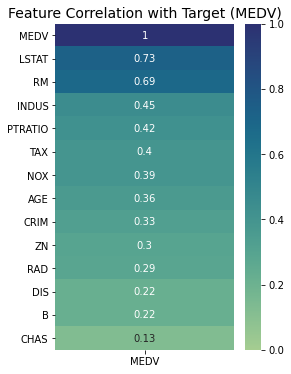

In [45]:
#Feature correlation with the target variable

plt.figure(figsize=(4,6))

sns.heatmap(abs(df.corr())[['MEDV']].sort_values(by='MEDV',
        ascending=False), vmin=0, vmax=1, annot=True, cmap= "crest")


plt.title("Feature Correlation with Target (MEDV)", fontsize = 14)

#lt.savefig("Regression - Feature Correlation.png")
plt.show()

- LSTAT and RM have the strongest relationship with the target varaiable. 
- CHAS and B have the least strongest relationship with the target variable.

### Exploratory Data Analysis

#### Do the structural factors such as number of rooms and age of house and accessibility factors such as distance to highways and employment centres affect the value of houses? 

##### RM - Number of rooms

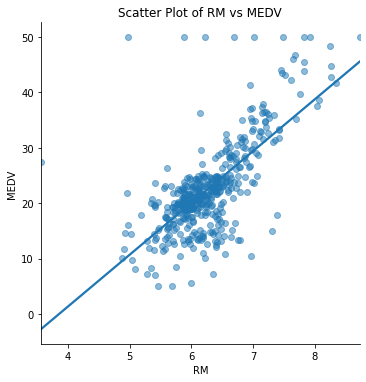

In [50]:
#Scatter plot with smoothing line
sns.lmplot(x='RM', y='MEDV', data=df, order=1, ci=None, scatter_kws={'alpha':0.5})

# Add labels and title
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Scatter Plot of RM vs MEDV')
plt.show()

> - There is a clear linear relationship between the number of rooms in the house and its price.
> - Additional rooms increases the value of the house. 

##### Age

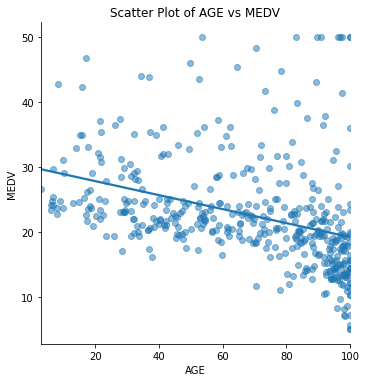

In [51]:
# Scatter plot with smoothing line
sns.lmplot(x='AGE', y='MEDV', data=df, order=1, ci=None, scatter_kws={'alpha':0.5})

# Add labels and title
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('Scatter Plot of AGE vs MEDV')
plt.show()

> As houses age, their value depreciates. <br>
Thus newly built houses will be more expensive than old ones.

##### DIS - Distance to the nearest employment centre

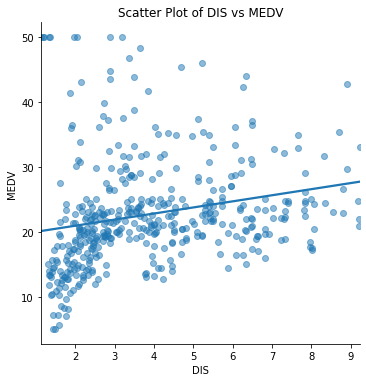

In [49]:
# Scatter plot with smoothing line

sns.lmplot(x='DIS', y='MEDV', data=df, order=1, ci=None, scatter_kws={'alpha':0.5})

plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Scatter Plot of DIS vs MEDV')
plt.show()

> There is a non-linear positive relationship between the house prices and the distance to the employment centre

#### Does the level of air pollution play a role in the price of houses in the Boston area? 

The level of air pollution is measured by the variable 'NOX', which is the level of toxic gases. 

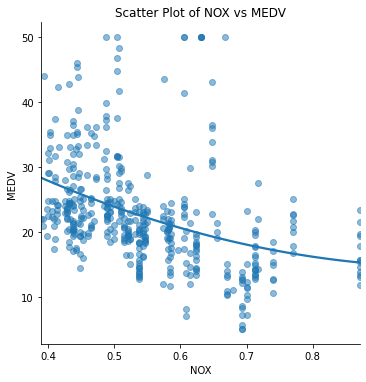

In [52]:
# Scatter plot with smoothing line

sns.lmplot(x='NOX', y='MEDV', data=df, order=2, ci=None, scatter_kws={'alpha':0.5})

plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.title('Scatter Plot of NOX vs MEDV')
plt.show()

> There is a non-linear negative relationship between NOX and MEDV indicating that as the level of air pollution increases the house prices decrease

#### What type of neighborhood is more desirable for home buyers?

##### LSTAT - Population of lower status people

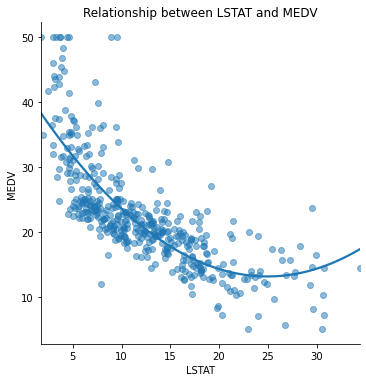

In [53]:
#scatterplot with smoothing line
sns.lmplot(x='LSTAT', y='MEDV', data=df, order=2, ci=None, scatter_kws={'alpha':0.5})

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Relationship between LSTAT and MEDV')
plt.show()

> - A strong negative and non-linear relationship is detected between LSTAT and MEDV. 
> - The house prices in neighborhoods with more lower and middle class population is typically lower compared to high-end neighborhoods. 

##### CRIM - The crime rate in the town

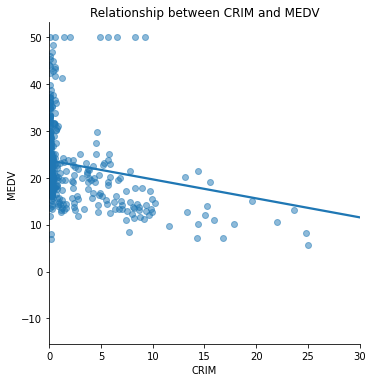

In [56]:
# Scatter plot with smoothing line

sns.lmplot(x='CRIM', y='MEDV', data=df, order=1, ci=None, scatter_kws={'alpha':0.5})

plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.xlim(0,30)
plt.title('Relationship between CRIM and MEDV')
plt.show()

> - The crime rate and house prices have an approximately linear, negative relationship.
> - The value of houses in a neighborhood with high crime rates is likely to be low. 

#### TAX - Property tax rates of the neighborhood

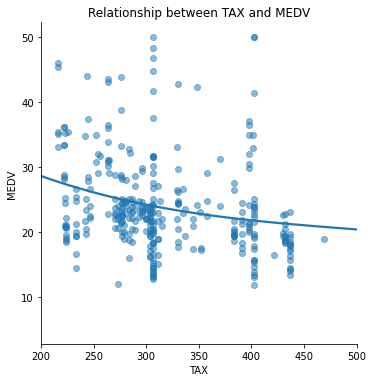

In [58]:
# Scatter plot with smoothing line

sns.lmplot(x='TAX', y='MEDV', data=df, order=3, ci=None, scatter_kws={'alpha':0.5})

plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.xlim(200,500)
plt.title('Relationship between TAX and MEDV')
plt.show()

> There is a non-linear negative relationship between the tax rates and house prices, indicating that higher property tax rates decreases the house prices.

##### PTRATIO - Ratio of teachers to people in the town

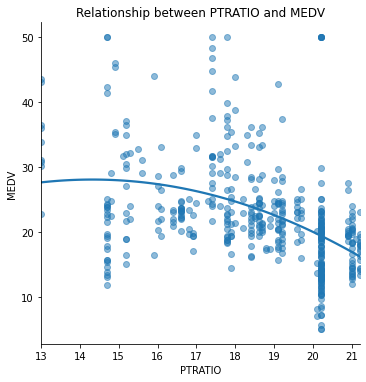

In [59]:
# Scatter plot with smoothing line

sns.lmplot(x='PTRATIO', y='MEDV', data=df, order=2, ci=None, scatter_kws={'alpha':0.5})

plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.title('Relationship between PTRATIO and MEDV')
plt.show()

> A linear relationship cannot be detected between the house prices and the teacher-people ratio of the town.

### Data Preprocessing

In [60]:
#seprerating the target and predictors
x = df.drop("MEDV", axis = 1)
y = df["MEDV"]

In [61]:
#spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)

#### Feature Selection

Choosing only the most relevant features to include in the model

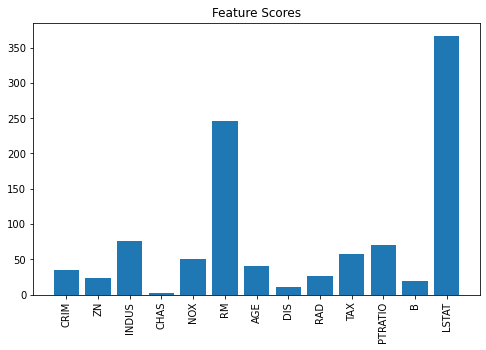

In [83]:
kbest = SelectKBest(score_func=f_regression, k=9)
kbest.fit_transform(x_train, y_train)

plt.figure(figsize = (8,5))
plt.bar([x_train.columns[i] for i in range(len(kbest.scores_))], kbest.scores_)
plt.xticks(rotation=90)
plt.title("Feature Scores")
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

kbest = kbest.get_support()
kbest = x_train.columns[kbest]

> **Note:** 'RAD' has been dropped and only 'TAX' is being retained in the model, thus reducing the effects of multicollinearity

In [85]:
#keeping only the selected features
kbest = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT', 'ZN']

x_train = x_train[kbest]
x_test = x_test[kbest]

In [88]:
#scaling the data
scaler = StandardScaler()

scale_train = scaler.fit_transform(x_train)
scale_test = scaler.transform(x_test)

x_train = pd.DataFrame(data = scale_train, columns = x_train.columns)
x_test = pd.DataFrame(data = scale_test, columns = x_test.columns)

### Regression Models

#### 1. Multiple Linear Regression

In [91]:
#instantiating the model 
mlr = linear_model.LinearRegression()

#fitting the model
mlr.fit(x_train, y_train)

#predicting on the testing set
mlr_predict = mlr.predict(x_test)

#assessing the model
r2_lr = round(metrics.r2_score(y_test, mlr_predict), 3)
mse_lr = round(metrics.mean_squared_error(y_test, mlr_predict), 3)

print("R squared: ", r2_lr)
print("Mean Squared Error: ", mse_lr)

R squared:  0.735
Mean Squared Error:  20.244


##### Checking whether the linear regression assumptions hold

In [92]:
residuals = y_test.values - mlr_predict

1. Residuals should be normally distributed

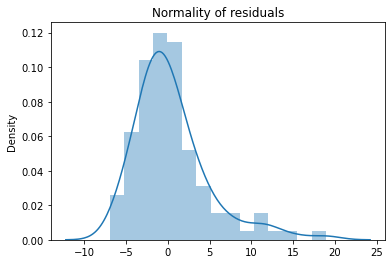

In [96]:
#density plot

plt.figure(figsize =(6,4))
sns.distplot(residuals,kde=True)
plt.title('Normality of residuals')

#plt.savefig("Regression assumption 1.png")
plt.show()

> The bell curve shows that the residuals follow a normal distribution with a mean value of 0 approximately

2. Homoscedasticity - Residuals should have a constant variance

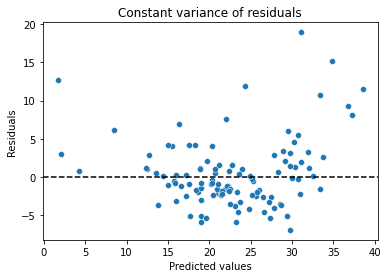

In [98]:
plt.figure(figsize =(6,4))

sns.scatterplot(mlr_predict,residuals)
plt.axhline(color='black', linestyle='--')

plt.title('Constant variance of residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

#plt.savefig("Regression assumption 2.png")
plt.show()

> There is no pattern detected and the residuals are spread out uniformly, indicating homoscedasticity

3. Residuals should be uncorrelated with each other - No autocorrelation

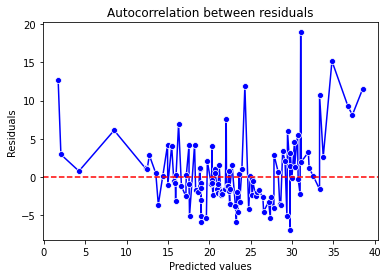

In [99]:
plt.figure(figsize=(6,4))

sns.lineplot(mlr_predict,residuals,marker='o',color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.axhline(color='red', linestyle='--')
plt.title('Autocorrelation between residuals')

#plt.savefig("Regression assumption 3.png")
plt.show()

> There does not appear to be any visible pattern, indicating that there is no autocorrelation between the residuals

#### 2. Polynomial Regression

In [102]:
poly = PolynomialFeatures(degree = 2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

pr = linear_model.LinearRegression()

pr.fit(x_train_poly, y_train)

pr_predict = pr.predict(x_test_poly)

r2_pr = round(metrics.r2_score(y_test, pr_predict), 3)
mse_pr = round(metrics.mean_squared_error(y_test, pr_predict), 3)

print("R Squared:", r2_pr)
print("Mean Squared Error:", mse_pr)


R Squared: 0.854
Mean Squared Error: 11.13


#### 3. Decision Tree Regression

In [104]:
#instantiating the model
dt = DecisionTreeRegressor(random_state = 42)

#fitting the model
dt.fit(x_train, y_train)

#predicting on the testing set
dt_predict = dt.predict(x_test)

#assessing the model
r2_dt = round(metrics.r2_score(y_test, dt_predict), 3)
mse_dt = round(metrics.mean_squared_error(y_test, dt_predict), 3)

print("R squared: ", r2_dt)
print("Mean Squared Error: ", mse_dt)

R squared:  0.758
Mean Squared Error:  18.513


##### Hyper-parameter Tuning

In [105]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [106]:
params_dt = {"max_depth": [2,4,8,10],
            "max_features": ["auto", "log2"], 
            "min_samples_leaf": [1,2,3,4],
            "min_samples_split": [1,2,3,4,5,10]
            }


dt_rs = dt_RandomGrid = RandomizedSearchCV(
    estimator = dt, param_distributions = params_dt, cv = 10, verbose=2, n_jobs = -1, 
scoring = "neg_mean_squared_error", n_iter = 20)

dt_rs.fit(x_train, y_train)
print(dt_rs.best_estimator_)

dt_cv = dt_rs.best_estimator_
dt_cv.fit(x_train, y_train)

pred_dt_cv = dt_cv.predict(x_test)

r2_dt_cv = round(metrics.r2_score(y_test, pred_dt_cv), 3)
mse_dt_cv = round(metrics.mean_squared_error(y_test, pred_dt_cv), 3)


print('R2: ', r2_dt_cv)
print('Mean Squared Error: ', mse_dt_cv)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_leaf=2,
                      min_samples_split=4, random_state=42)
R2:  0.826
Mean Squared Error:  13.286


There has been an improvement in the accuracy following hyper-parameter tuning

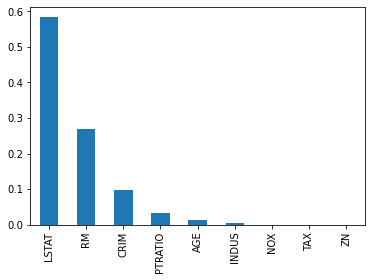

In [108]:
# Feature importances from the model
feature_importances = pd.Series(dt_cv.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plotthing the features
plt.figure(figsize=(6,4))
feature_importances.plot.bar()
plt.show()


#### 4. Random Forest Regression

In [118]:
#instantiating the model
rf = RandomForestRegressor(random_state = 42)

#fitting the model
rf.fit(x_train, y_train)

#predicting on the testing set
rf_predict = rf.predict(x_test)

#assessing the model
r2_rf = round(metrics.r2_score(y_test, rf_predict), 3)
mse_rf = round(metrics.mean_squared_error(y_test, rf_predict), 3)

print("R squared: ", r2_rf)
print("Mean Squared Error: ", mse_rf)

R squared:  0.871
Mean Squared Error:  9.848


##### Hyper-parameter Tuning

In [119]:
params_rf = {"max_depth": [2,4,8,10,12,15],
            "max_features": ["auto"], 
            "min_samples_leaf": [1,2,3,4],
            "min_samples_split": [1,2,3,4,5,10],
            "n_estimators": [50,100,150,200,20]
            }

rf_rs = rf_RandomGrid = RandomizedSearchCV(
    estimator = rf, param_distributions = params_rf, cv = 10, verbose=2, n_jobs = -1, 
scoring = "neg_mean_squared_error", n_iter = 20)

rf_rs.fit(x_train, y_train)
#print(rf_rs.best_estimator_)

rf_cv = rf_rs.best_estimator_
rf_cv.fit(x_train, y_train)

pred_rf_cv = rf_cv.predict(x_test)


r2_rf_cv = round(metrics.r2_score(y_test, pred_rf_cv), 3)
mse_rf_cv = round(metrics.mean_squared_error(y_test, pred_rf_cv), 3)

print('R2: ', r2_rf_cv)
print('Mean Squared Error: ', mse_rf_cv)



Fitting 10 folds for each of 20 candidates, totalling 200 fits
R2:  0.87
Mean Squared Error:  9.907


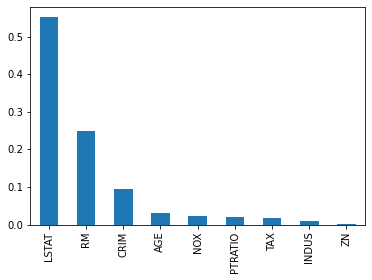

In [117]:
# Feature importances from the model
feature_importances = pd.Series(rf_cv.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plotthing the features
plt.figure(figsize=(6,4))
feature_importances.plot.bar()
plt.show()


#### 5. XGBoost Regression

In [120]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror') 
xgbr.fit(x_train,y_train)

#Generate predicted values
y_pred_xg = xgbr.predict(x_test)

#Calculate and print the RMSE and the accuracy of our model.
mse_xg=metrics.mean_squared_error(y_test, y_pred_xg)
r2_xg=metrics.r2_score(y_test,y_pred_xg)

print("R2:", round(r2_xg, 3))
print("Mean Square Error:", round(mse_xg, 3))

R2: 0.887
Mean Square Error: 8.632


##### Hyper-parameter Tuning

In [121]:
params = { 'max_depth': [6,10],
           'learning_rate': [0.01, 0.10],
           'colsample_bylevel': [0.3, 0.4]
         }

xgbr = xgb.XGBRegressor(seed=50)
xg_rs = RandomizedSearchCV(estimator=xgbr, 
                   param_distributions=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

xg_rs.fit(x_train, y_train)

xg_cv = xg_rs.best_estimator_
xg_cv.fit(x_train, y_train)

pred_xg_cv = xg_cv.predict(x_test)


r2_xg_cv = round(metrics.r2_score(y_test, pred_xg_cv), 3)
mse_xg_cv = round(metrics.mean_squared_error(y_test, pred_xg_cv), 3)

print('R2: ', r2_xg_cv)
print('Mean Squared Error: ', mse_xg_cv)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
R2:  0.893
Mean Squared Error:  8.217


There has been an improvement in the fit after hyper-parameter tuning

### Performance Evaluation

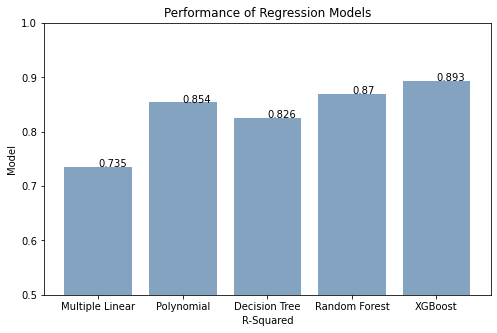

In [138]:
data = {"Multiple Linear": r2_lr,
        "Polynomial": r2_pr,
       "Decision Tree": r2_dt_cv,
       "Random Forest": r2_rf_cv,
       "XGBoost": r2_xg_cv}

plt.figure(figsize = (8,5))
plt.bar(list(data.keys()), list(data.values()), color=(0.2, 0.4, 0.6, 0.6))

for i in range(len(data.keys())):
    plt.text(i,list(data.values())[i],list(data.values())[i])
    
plt.xlabel("R-Squared")
plt.ylabel("Model")
plt.ylim(0.5, 1)
plt.title("Performance of Regression Models")

#plt.savefig("Regression - performance.png")
plt.show()

- The **XGBoost regressor** model has the best performance with the highest R-squared and lowest MSE value. <br>
- The multiple linear regression model performs the worst, which was expected since majority of the predictor variables did not have a linear relationship with the target. 